# General relativity using symbolic computer algebra

In [1]:
from gravipy import *
init_printing()

## Eddington-Finkelstein coordinates

The Schwarzschild solution derived as vacuum solution for an object of mass $M$ in [another notebook](SchwarzschildMetric.ipynb) is parametrized in coordinates which lead to a coordinate singularity at the Schwarzschild radius $r_\text{S} = 2GM/c^2$. As we have seen by computing the Kretschmann invariant, there is actually only a true singularity at $r=0$.

In order to describe motion across the Schwarzschild radius, alternative parametrizations of the Schwarzschild solution are frequently used. The respective metric tensors are usually obtained from the standard Schwarzschild metric by specifying the coordinate transformation explicitly. In the following, we will take a different point of view. We will start from a given metric and verify that this metric indeed solves the vacuum Einstein field equation. With the help of GraviPy, this can be done quite easily.

At the end of each calculation, we will check the value of the Kretschmann invariant

$$R_{\mu\nu\rho\sigma}R^{\mu\nu\rho\sigma}$$

which can be calculated by the function defined in the following cell.

In [2]:
from itertools import product

def Kretschmann(Riemann):
    Kretschmann = symbols('Kretschmann')
    Kretschmann = 0
    for mu, nu, rho, sigma in product(range(1, 5), repeat=4):
        Kretschmann = Kretschmann+Riemann(mu, nu, rho, sigma)*Riemann(-mu, -nu, -rho, -sigma)
    return simplify(Kretschmann)

#### Ingoing Eddington-Finkelstein coordinates

Ingoing Eddington-Finkelstein coordinates are introduced by defining a new time coordinate $t'$ in terms of the time $t$ appropriate at very large distances from the object through

$$ct' = ct+r_\text{S}\log\left(\left\vert\frac{r}{r_\text{S}}-1\right\vert\right)$$

This choice avoids the singularity at $r=r_\text{S}$ for ingoing null geodesics. The spatial coordinates $r$, $\theta$ and $\phi$ remain unchanged. Since the new time coordinate $t'$ depends both on $t$ and $r$, the new metric tensor is non-diagonal. The new line element reads

$$\text{d}s^2 = -\left(1-\frac{r_\text{S}}{r}\right)c^2\text{d}t'^2
                +2\frac{r_\text{S}}{r}c\text{d}t'\text{d}r
                +\left(1+\frac{r_\text{S}}{r}\right)\text{d}r^2
                +r^2\text{d}\theta^2+r^2\sin^2(\theta)\text{d}\phi^2
$$

For the sake of simplicity, the object `t` will in the following represent the new time $ct'$.

We first introduce the needed symbols and define the metric tensor.

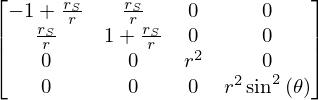

In [3]:
t, r, theta, phi, rs = symbols(r't, r, \theta, \phi, r_S')
x = Coordinates('x', [t, r, theta, phi])
Metric = Matrix([[-(1-rs/r), rs/r, 0, 0],
                 [rs/r, 1+rs/r, 0, 0],
                 [0, 0, r**2, 0],
                 [0, 0, 0, r**2*sin(theta)**2]])
g = MetricTensor('g', x, Metric)
g(All, All)

Now, the Ricci tensor, the Einstein tensor, and the Riemann tensor can be determined.

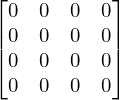

In [4]:
Gamma = Christoffel(r'\Gamma', g)
Ri = Ricci('Ri', g)
G = Einstein('G', Ri)
G(All, All)

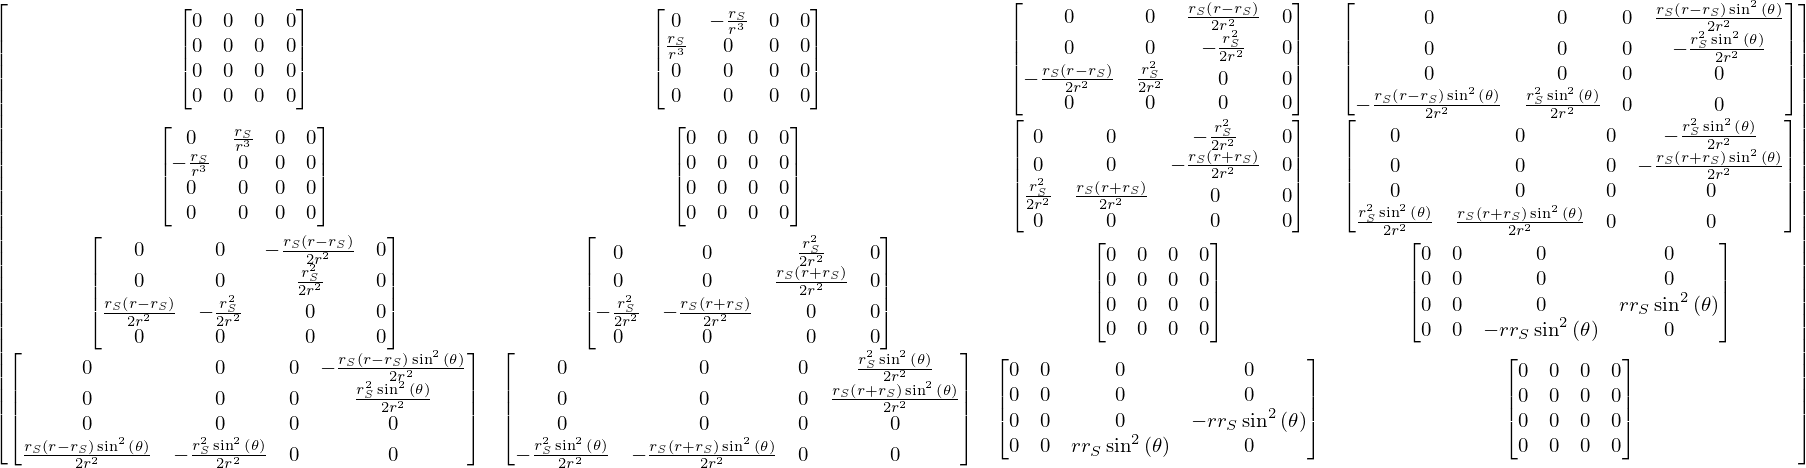

In [5]:
Rm_in = Riemann('Rm', g)
Rm_in(All, All, All, All)

Indeed, the Einstein tensor (and also the Ricci tensor) vanishes, while the Riemann tensor contains nonvanishing elements. We recall that is only possible in space-times of dimension 4 and higher that the vacuum solution of the Einstein field equation has a nonvanishing curvature.

We finally determine the Kretschmann invariant. [Earlier](SchwarzschildMetric.ipynb) we had found for the Schwarzschild solution the value $48G^2M^2/r^6c^4$. Now we find

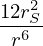

In [6]:
Kretschmann(Rm_in)

which agrees with our earlier result in view of $r_\text{S}=2GM/c^2$.

#### Outgoing Eddington-Finkelstein coordinates

Outgoing Eddington-Finkelstein coordinates differ from their ingoing counterpart by a different sign in front of the second term of the definition of $t'$. Specifically, one has

$$ct' = ct-r_\text{S}\log\left(\left\vert\frac{r}{r_\text{S}}-1\right\vert\right)$$

This choice avoids the singularity at $r=r_\text{S}$ for outgoing null geodesics. The new line element then simply changes sign in the off-diagonal element and reads

$$\text{d}s^2 = -\left(1-\frac{r_\text{S}}{r}\right)c^2\text{d}t'^2
                -2\frac{r_\text{S}}{r}c\text{d}t'\text{d}r
                +\left(1+\frac{r_\text{S}}{r}\right)\text{d}r^2
                +r^2\text{d}\theta^2+r^2\sin^2(\theta)\text{d}\phi^2
$$

We proceed as before for the ingoing Eddington-Finkelstein coordinates without need of much comments.

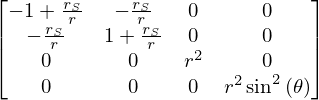

In [7]:
t, r, theta, phi, rs = symbols(r't, r, \theta, \phi, r_S')
x = Coordinates('x', [t, r, theta, phi])
Metric = Matrix([[-(1-rs/r), -rs/r, 0, 0],
                 [-rs/r, 1+rs/r, 0, 0],
                 [0, 0, r**2, 0],
                 [0, 0, 0, r**2*sin(theta)**2]])
g = MetricTensor('g', x, Metric)
g(All, All)

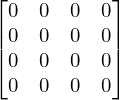

In [8]:
Gamma = Christoffel(r'\Gamma', g)
Ri = Ricci('Ri', g)
G = Einstein('G', Ri)
G(All, All)

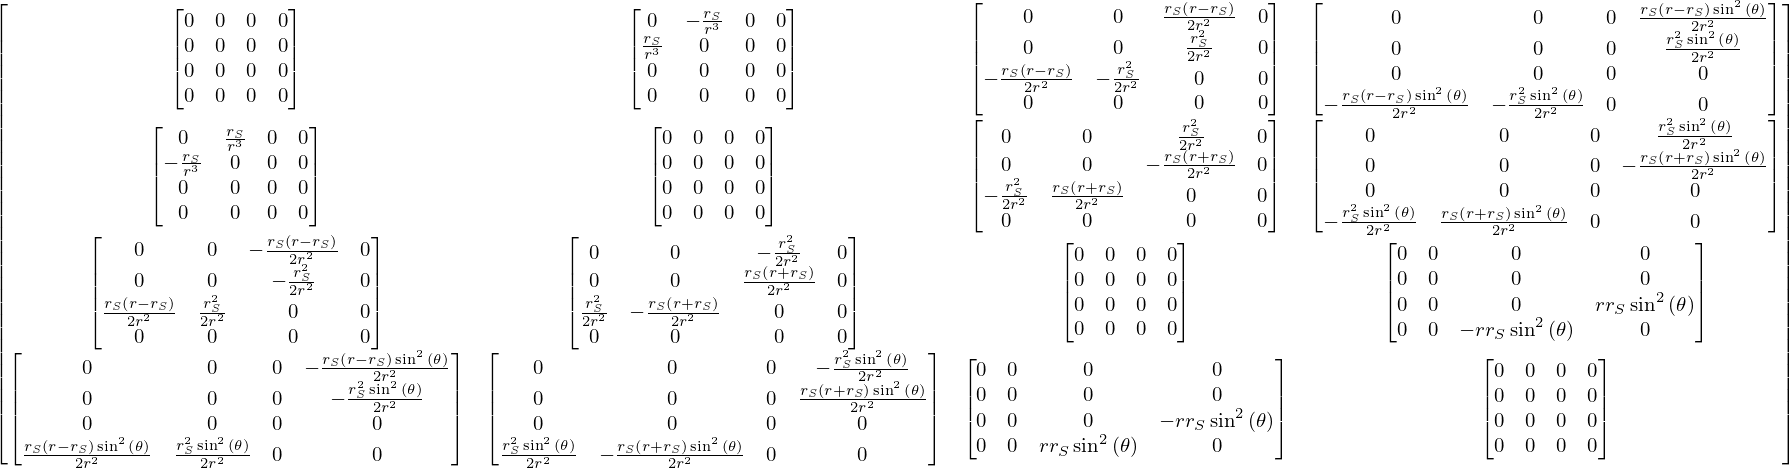

In [9]:
Rm_out = Riemann('Rm', g)
Rm_out(All, All, All, All)

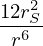

In [10]:
Kretschmann(Rm_out)

Comparison of the Riemann curvature tensors for ingoing and outgoing Eddington-Finkelstein coordinates reveals that some components agree while some differ in sign. An example for the first case is $R_{1212}$ while an example for the second case is given by $R_{1323}$.

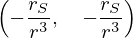

In [11]:
Rm_in(1, 2, 1, 2), Rm_out(1, 2, 1, 2)

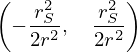

In [12]:
Rm_in(1, 3, 2, 3), Rm_out(1, 3, 2, 3)